In [1]:
install.packages('dplyr')
install.packages('tidyverse')
install.packages('caret')
install.packages('BGLR')
install.packages('stringi')
install.packages('Matrix')
install.packages('plyr')

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘desc’, ‘pkgbuild’, ‘rprojroot’, ‘pkgload’, ‘praise’, ‘testthat’, ‘isoband’, ‘dbplyr’, ‘ggplot2’, ‘haven’, ‘hms’, ‘httr’, ‘modelr’, ‘purrr’, ‘reprex’, ‘rvest’, ‘tibble’, ‘xml2’


Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ModelMetrics’, ‘recipes’, ‘pROC’


Warning message in install.packages("caret"):
“installation of package ‘recipes’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependency ‘truncnorm’




In [22]:
require("dplyr")
require('BGLR')
require('tidyverse')
require('caret')
require('plyr')

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: caret


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [4]:
setwd('gxe-gee-lmm')

In [155]:
## Import Data and Prep for Analysis

ERROR: Error in parse(text = x, srcfile = src): <text>:2:63: unexpected ')'
1: ## Import Data and Prep for Analysis
2: y_train[sort(as.charactery_train$Unique_ID), index.return=TRUE)
                                                                 ^


In [163]:
# Import CSV files of target data
y_train <- data.frame(read.csv('y_train_scaled.csv'))
y_test <- data.frame(read.csv('y_test_scaled.csv'))

In [164]:
y_train <- arrange(y_train, Unique_ID)
y_test <- arrange(y_test, Unique_ID)

In [165]:
head(y_train)

,Unique_ID,GRAIN_YIELD
,<fct>,<dbl>
1,10ESWYT_10002_7090_5,-0.5279961
2,10ESWYT_10002_7507_14,-0.7137174
3,10ESWYT_10002_7507_8,-0.7023653
4,10ESWYT_10002_7655_8,-0.5661393
5,10ESWYT_10002_7691_50,-0.3159376
6,10ESWYT_10002_7707_6,-0.6751201


In [166]:
rownames(y_train) = y_train$Unique_ID
rownames(y_test) = y_test$Unique_ID
y_train = subset(y_train, select = -c(Unique_ID))
y_test = subset(y_test, select = -c(Unique_ID))

In [167]:
head(y_train)

,GRAIN_YIELD
,<dbl>
10ESWYT_10002_7090_5,-0.5279961
10ESWYT_10002_7507_14,-0.7137174
10ESWYT_10002_7507_8,-0.7023653
10ESWYT_10002_7655_8,-0.5661393
10ESWYT_10002_7691_50,-0.3159376
10ESWYT_10002_7707_6,-0.6751201


In [168]:
print(dim(y_train))
print(dim(y_test))

[1] 137318      1
[1] 15258     1


In [169]:
# Import CSV files of environmental data for CIMMYT and GEE
W_CIMMYT_train <- read.csv('X_train_scaled.csv')
W_CIMMYT_test <- read.csv('X_test_scaled.csv')
W_gee_train <- read.csv('X_train_gee_scaled.csv')
W_gee_test <- read.csv('X_test_gee_scaled.csv')

print(dim(W_CIMMYT_train))
print(dim(W_CIMMYT_test))
print(dim(W_gee_train))
print(dim(W_gee_test))

[1] 137318     59
[1] 15258    59
[1] 137318    340
[1] 15258   340


In [170]:
W_CIMMYT_train <- arrange(W_CIMMYT_train, Unique_ID)
W_CIMMYT_test <- arrange(W_CIMMYT_test, Unique_ID)
W_gee_train <- arrange(W_gee_train, Unique_ID)
W_gee_test <- arrange(W_gee_test, Unique_ID)

rownames(W_CIMMYT_train) = W_CIMMYT_train$Unique_ID
rownames(W_CIMMYT_test) = W_CIMMYT_test$Unique_ID
rownames(W_gee_train) = W_gee_train$Unique_ID
rownames(W_gee_test) = W_gee_test$Unique_ID

W_CIMMYT_train <- subset(W_CIMMYT_train, select = -c(Unique_ID))
W_CIMMYT_test <- subset(W_CIMMYT_test, select = -c(Unique_ID))
W_gee_train <- subset(W_gee_train, select = -c(Unique_ID))
W_gee_test <- subset(W_gee_test, select = -c(Unique_ID))

In [171]:
head(W_CIMMYT_train)

,ALTITUDE,PPN_10TH_MO_BEFORE_HARVESTED,PPN_11TH_MO_BEFORE_HARVESTED,PPN_1ST_MO_BEFORE_HARVESTED,PPN_2ND_MO_BEFORE_HARVESTED,PPN_3RD_MO_BEFORE_HARVESTED,PPN_4TH_MO_BEFORE_HARVESTED,PPN_5TH_MO_BEFORE_HARVESTED,PPN_6TH_MO_BEFORE_HARVESTED,PPN_7TH_MO_BEFORE_HARVESTED,⋯,ROOT_DISEASE_DEVELOPMENT_SLIGHT,ROOT_DISEASE_DEVELOPMENT_TRACES,HAIL_DAMAGE_MODERATE,HAIL_DAMAGE_SEVERE,HAIL_DAMAGE_SLIGHT,HAIL_DAMAGE_TRACES,FROST_DAMAGE_SPIKE_MODERATE,FROST_DAMAGE_SPIKE_SEVERE,FROST_DAMAGE_SPIKE_SLIGHT,FROST_DAMAGE_SPIKE_TRACES
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10ESWYT_10002_7090_5,1.779081,0.04496832,-0.5929472,-0.4971122,1.613005,0.5697496,0.3589396,1.062342,0.7304574,-0.4942977,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7507_14,1.779081,0.04496832,-0.5929472,-0.4971122,1.613005,0.5697496,0.3589396,1.062342,0.7304574,-0.4942977,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7507_8,1.779081,0.04496832,-0.5929472,-0.4971122,1.613005,0.5697496,0.3589396,1.062342,0.7304574,-0.4942977,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7655_8,1.779081,0.04496832,-0.5929472,-0.4971122,1.613005,0.5697496,0.3589396,1.062342,0.7304574,-0.4942977,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7691_50,1.779081,0.04496832,-0.5929472,-0.4971122,1.613005,0.5697496,0.3589396,1.062342,0.7304574,-0.4942977,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7741_7,1.779081,0.04496832,-0.5929472,-0.4971122,1.613005,0.5697496,0.3589396,1.062342,0.7304574,-0.4942977,⋯,0,0,0,0,0,0,0,0,0,0


In [173]:
head(W_CIMMYT_test)

,ALTITUDE,PPN_10TH_MO_BEFORE_HARVESTED,PPN_11TH_MO_BEFORE_HARVESTED,PPN_1ST_MO_BEFORE_HARVESTED,PPN_2ND_MO_BEFORE_HARVESTED,PPN_3RD_MO_BEFORE_HARVESTED,PPN_4TH_MO_BEFORE_HARVESTED,PPN_5TH_MO_BEFORE_HARVESTED,PPN_6TH_MO_BEFORE_HARVESTED,PPN_7TH_MO_BEFORE_HARVESTED,⋯,ROOT_DISEASE_DEVELOPMENT_SLIGHT,ROOT_DISEASE_DEVELOPMENT_TRACES,HAIL_DAMAGE_MODERATE,HAIL_DAMAGE_SEVERE,HAIL_DAMAGE_SLIGHT,HAIL_DAMAGE_TRACES,FROST_DAMAGE_SPIKE_MODERATE,FROST_DAMAGE_SPIKE_SEVERE,FROST_DAMAGE_SPIKE_SLIGHT,FROST_DAMAGE_SPIKE_TRACES
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10ESWYT_10002_7707_6,1.7722475,0.03739563,-0.5930891,-0.49783460,1.6263179,0.5611678,0.3413353,1.0616585,0.7516612,-0.4964526,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7737_8,1.7722475,0.03739563,-0.5930891,-0.49783460,1.6263179,0.5611678,0.3413353,1.0616585,0.7516612,-0.4964526,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7799_0,1.7722475,0.03739563,-0.5930891,-0.49783460,1.6263179,0.5611678,0.3413353,1.0616585,0.7516612,-0.4964526,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7866_24,1.7722475,0.03739563,-0.5930891,-0.49783460,1.6263179,0.5611678,0.3413353,1.0616585,0.7516612,-0.4964526,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10018_7655_8,-0.4962647,-0.59732733,-0.1831613,0.05163281,-0.5324353,-0.5529717,0.2095376,-0.4744991,0.2385336,-0.2211024,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10018_7890_6,-0.4962647,-0.59732733,-0.1831613,0.05163281,-0.5324353,-0.5529717,0.2095376,-0.4744991,0.2385336,-0.2211024,⋯,0,0,0,0,0,0,0,0,0,0


In [174]:
# Import pedigree matrix
A <- read.csv('A_matrix_unique.csv', row.names = 1)

In [175]:
dim(A)

[1] 3489 3489

In [176]:
# A matrix doesn't read in well as a CSV, need to repeat some processing steps
# Remove the X prefix from the column names
names(A) <- substring(names(A),2)
A <- A[order(rownames(A)),order(names(A))]
print(colnames(A)[1])
print(rownames(A)[1])

[1] "100507"
[1] "100507"


In [177]:
A[1:5,1:5]

,100507,100761,1047493,1050296,1058137
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100507,1.5,0.000000,0.0000000,0.0000000,0.0000000
100761,0.0,1.527344,0.0000000,0.0000000,0.0000000
1047493,0.0,0.000000,1.5905526,0.5575323,0.2434399
1050296,0.0,0.000000,0.5575323,1.6102377,0.2187396
1058137,0.0,0.000000,0.2434399,0.2187396,1.4766731


In [178]:
dim(A)

[1] 3489 3489

In [182]:
X_train_GID <- read.csv('X_train_GID.csv')
X_test_GID <- read.csv('X_test_GID.csv')

In [184]:
X_train_GID <- arrange(X_train_GID, Unique_ID)
X_test_GID <- arrange(X_test_GID, Unique_ID)

rownames(X_train_GID) = X_train_GID$Unique_ID
rownames(X_test_GID) = X_test_GID$Unique_ID

X_train_GID <- subset(X_train_GID, select = -c(Unique_ID))
X_test_GID <- subset(X_test_GID, select = -c(Unique_ID))

In [185]:
head(X_train_GID)

,GID
,<int>
10ESWYT_10002_7090_5,27001
10ESWYT_10002_7507_14,30977
10ESWYT_10002_7507_8,41243
10ESWYT_10002_7655_8,42076
10ESWYT_10002_7691_50,3895
10ESWYT_10002_7741_7,13396


In [186]:
dim(X_train_GID)

[1] 137318      1

## Run Model on Sample of Data

Full dataset is too large, creates a 156Gb matrix and crashes the instance

In [200]:
# Set Sample Indices
train_random_sample <- sample(nrow(y_train), size = (nrow(y_train) * 1))
test_random_sample <- sample(nrow(y_test), size = (nrow(y_test) * 1))

In [201]:
# Sample Target Data
y_train_sample <- as.data.frame(y_train[train_random_sample,], row.names = row.names(y_train)[train_random_sample])
colnames(y_train_sample) <- c('GRAIN_YIELD')
y_test_sample <- as.data.frame(y_test[test_random_sample,], row.names = row.names(y_test)[test_random_sample])
colnames(y_test_sample) <- c('GRAIN_YIELD')

# Sample CIMMYT Environmental Data
W_CIMMYT_train_sample <- W_CIMMYT_train[train_random_sample,]
W_CIMMYT_test_sample <- W_CIMMYT_test[test_random_sample,]

# Sample GEE Environmental Data
W_gee_train_sample <- W_gee_train[train_random_sample,]
W_gee_test_sample <- W_gee_test[test_random_sample,]

# Sample Unique GID List
X_train_GID_sample <- as.data.frame(X_train_GID[train_random_sample,], row.names = row.names(X_train_GID)[train_random_sample])
colnames(X_train_GID_sample) <- c('GID')
X_test_GID_sample <- as.data.frame(X_test_GID[test_random_sample,], row.names = row.names(X_test_GID)[test_random_sample])
colnames(X_test_GID_sample) <- c('GID')

In [202]:
# Combine Train and Test but keep index of separation
y_sample <- rbind(y_train_sample,y_test_sample)
W_CIMMYT_sample <- rbind(W_CIMMYT_train_sample, W_CIMMYT_test_sample)
W_gee_sample <- rbind(W_gee_train_sample, W_gee_test_sample)
X_GID_sample <- rbind(X_train_GID_sample, X_test_GID_sample)
print(length(y_sample[train_random_sample,]))
print(length(y_sample[test_random_sample,]))
print(length(X_GID_sample[train_random_sample,]))
print(length(X_GID_sample[test_random_sample,]))

[1] 137318
[1] 15258
[1] 137318
[1] 15258


In [203]:
#set.seed(123)
#training.samples <- y_sample$GRAIN_YIELD %>%
#  createDataPartition(p = 0.9, list = FALSE)

y_train_na = y_sample$GRAIN_YIELD
y_train_na[-train_random_sample] = NA

In [204]:
head(y_train_na)

[1] -0.6365227 -0.2273908  1.0617609  0.6321950 -0.9271381  0.5640821

In [205]:
dim(X_GID_sample)

[1] 152576      1

## Model 1: Main Variety Effects

In [206]:
# Fitting Model 1 (Main Environment-Line Effects)
# (EL)

# incidence matrix for main eff. of environments.
# ZE = model.matrix(~factor(Y$ENV)-1)     

# incidence matrix for main eff. of lines.
X_GID_sample$GID = factor(x=X_GID_sample$GID,levels=rownames(A),ordered=TRUE)
ZVAR = model.matrix(~X_GID_sample$GID-1)
print(dim(ZVAR))
print(length(y_train_na))

[1] 152576   3489
[1] 152576


In [ ]:
# Model Fitting

# ETA = list(ENV=list(X=ZE,model='BRR'),
#            VAR=list(X=ZVAR,model='BRR'))

ETA = list(VAR=list(X=ZVAR,model='BRR'))

fm1 = BGLR(y=y_train_na,ETA=ETA,saveAt='M1_',nIter=500,burnIn=200)

          R2      RMSE       MAE
1 0.02427261 0.9878428 0.7878897


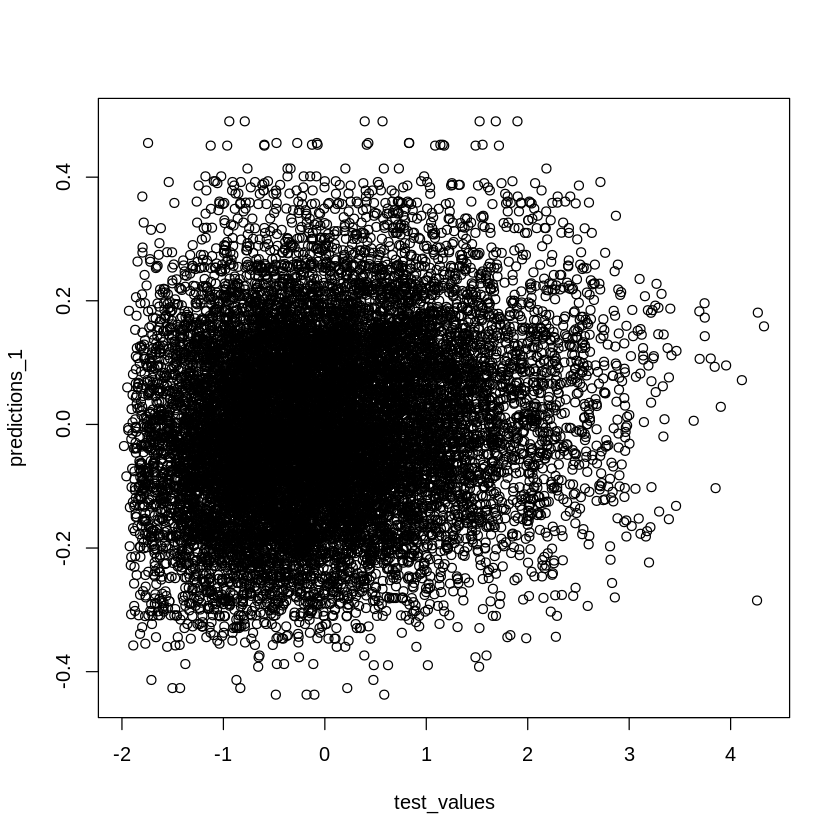

In [208]:
predictions_1 = fm1$yHat[-train_random_sample]
test_values = y_sample$GRAIN_YIELD[-train_random_sample]
R2 = R2(predictions_1, test_values)
RMSE = RMSE(predictions_1, test_values)
MAE = MAE(predictions_1, test_values)
model1_scores = data.frame(R2, RMSE, MAE)
print(model1_scores)
plot(test_values,predictions_1)

## Model 2: Main Pedigree Effects 

In [209]:
# Alternative Model 2 with Eigendecomposition

L_star = eigen(A, symmetric =TRUE)
Gamma = L_star$vectors
Lambda = L_star$values 
Z_star = ZVAR%*%Gamma%*%(Lambda^0.5)

In [197]:
# Fitting Model 2 with Alternative Z_star (Main Environment-Pedigree Effects)
# (EA)

# ETA = list(ENV=list(X=ZE,model='BRR'),
#            PED=list(X=Z_star,model='BRR'))

ETA = list(PED=list(X=Z_star,model='BRR'))

In [ ]:
fm2 = BGLR(y=y_train_na,ETA=ETA,saveAt='M2_',nIter=500,burnIn=100)

            R2    RMSE       MAE
1 2.857045e-05 1.00245 0.7987479


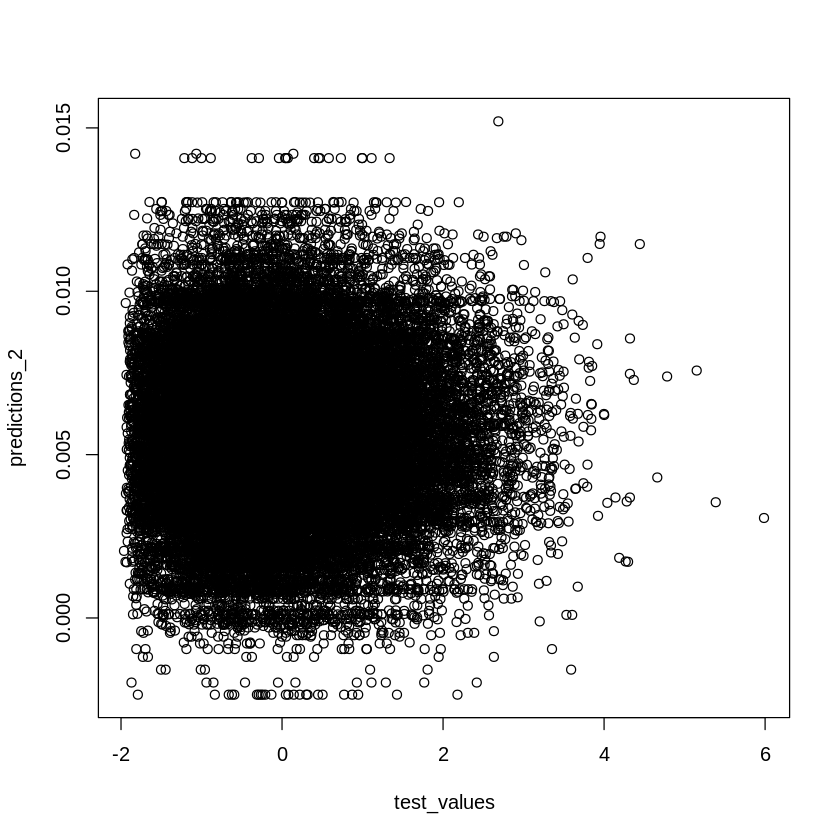

In [199]:
predictions_2 = fm2$yHat[-train_random_sample]
test_values = y_sample$GRAIN_YIELD[-train_random_sample]
R2 = R2(predictions_2, test_values)
RMSE = RMSE(predictions_2, test_values)
MAE = MAE(predictions_2, test_values)
model2_scores = data.frame(R2, RMSE, MAE)
print(model2_scores)
plot(test_values,predictions_2)

## Model 3: Just Environment Main Effects

In [210]:
W_CIMMYT_sample_div = W_CIMMYT_sample/sqrt(ncol(W_CIMMYT_sample))

In [211]:
# Model 3 with just EC - CIMMYT
ETA = list(EC=list(X=W_CIMMYT_sample_div,model='BRR'))

In [ ]:
fm3_ec_CIMMYT = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=1000,burnIn=500)

           R2    RMSE       MAE
1 0.001306718 1.00889 0.8070706


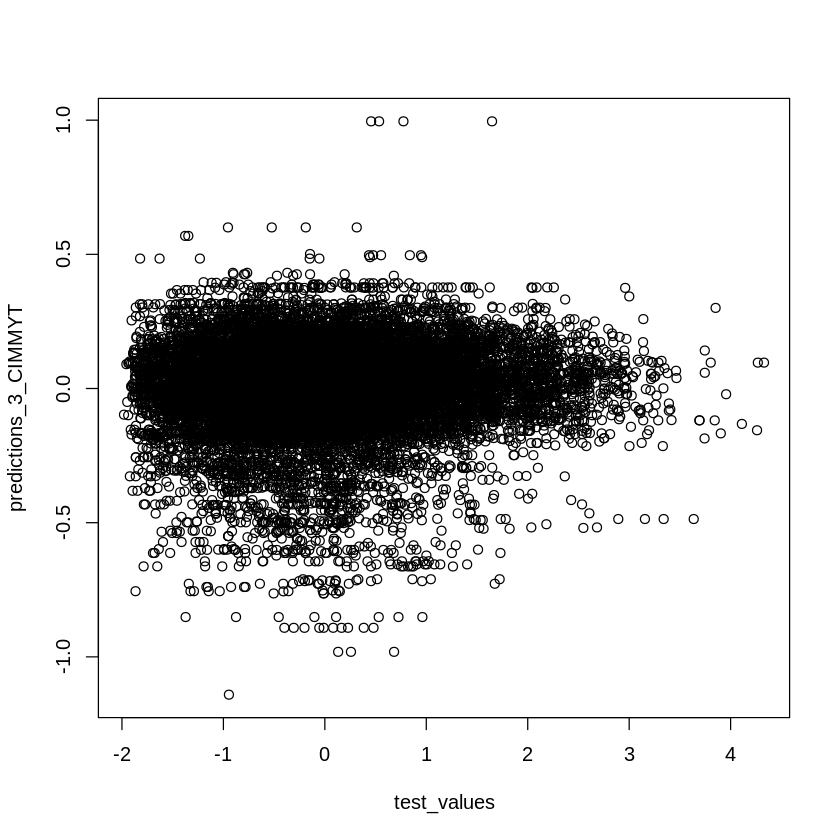

In [213]:
predictions_3_CIMMYT = fm3_ec_CIMMYT$yHat[-train_random_sample]
test_values = y_sample$GRAIN_YIELD[-train_random_sample]
R2 = R2(predictions_3_CIMMYT, test_values)
corr = cor(predictions_3_CIMMYT, test_values)
RMSE = RMSE(predictions_3_CIMMYT, test_values)
MAE = MAE(predictions_3_CIMMYT, test_values)
model3_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model3_CIMMYT_scores)
plot(test_values,predictions_3_CIMMYT)

In [214]:
head(predictions_3_CIMMYT)

[1]  0.05925547 -0.24853192  0.14160018  0.04187451 -0.21208385  0.01985600

In [215]:
head(test_values)

[1] -1.18044628 -0.08860446  0.46714257  3.03884367  2.27103527  0.63807134

In [60]:
W_gee_sample_div = W_gee_sample/sqrt(ncol(W_gee_sample))

In [61]:
# Model 3 with just EC - GEE
ETA = list(EC=list(X=W_gee_sample_div,model='BRR'))

In [ ]:
fm3_ec_gee = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=500,burnIn=200)

           R2      RMSE       MAE
1 0.001259028 0.9993682 0.7963942


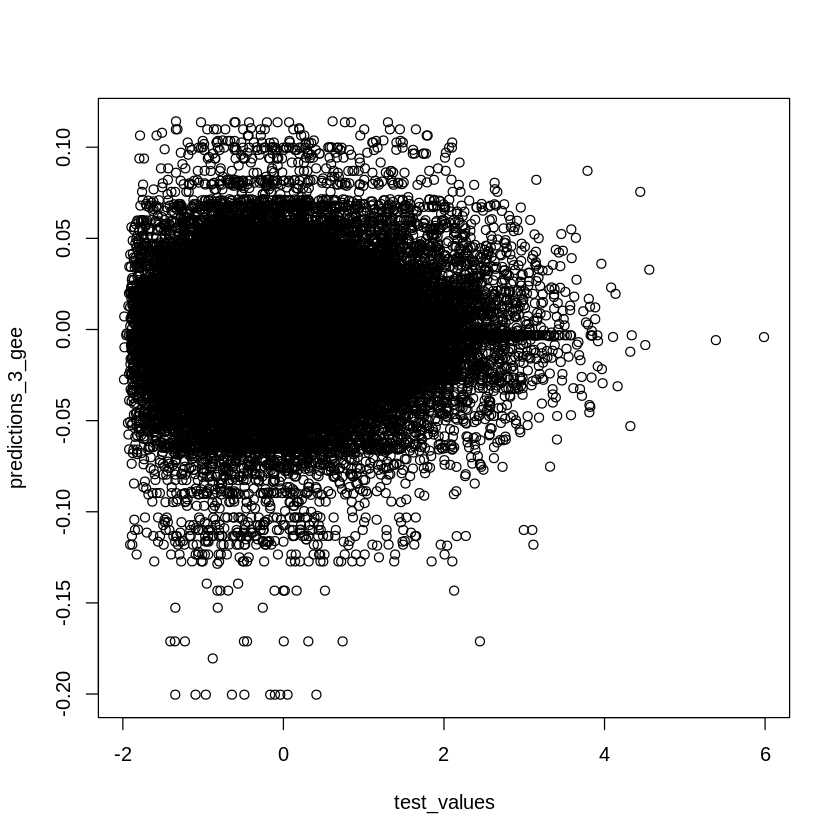

In [63]:
predictions_3_gee = fm3_ec_gee$yHat[-train_random_sample]
test_values = y_sample$GRAIN_YIELD[-train_random_sample]
R2 = R2(predictions_3_gee, test_values)
corr = cor(predictions_3_gee, test_values)
RMSE = RMSE(predictions_3_gee, test_values)
MAE = MAE(predictions_3_gee, test_values)
model3_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model3_CIMMYT_scores)
plot(test_values,predictions_3_gee)

## Model 4: Main Pedigree and Environment Effects

In [ ]:
# Fitting Model 3_CIMMYT (Main Environment-Pedigree-Environmental Covariate Effects)
# (EAW)

W_CIMMYT_sample_div = W_CIMMYT_sample/sqrt(ncol(W_CIMMYT_sample))

In [64]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_CIMMYT_sample_div,model='BRR'))

In [ ]:
fm4_CIMMYT = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=1000,burnIn=500)

            R2      RMSE       MAE
1 0.0007736293 0.9995997 0.7965778


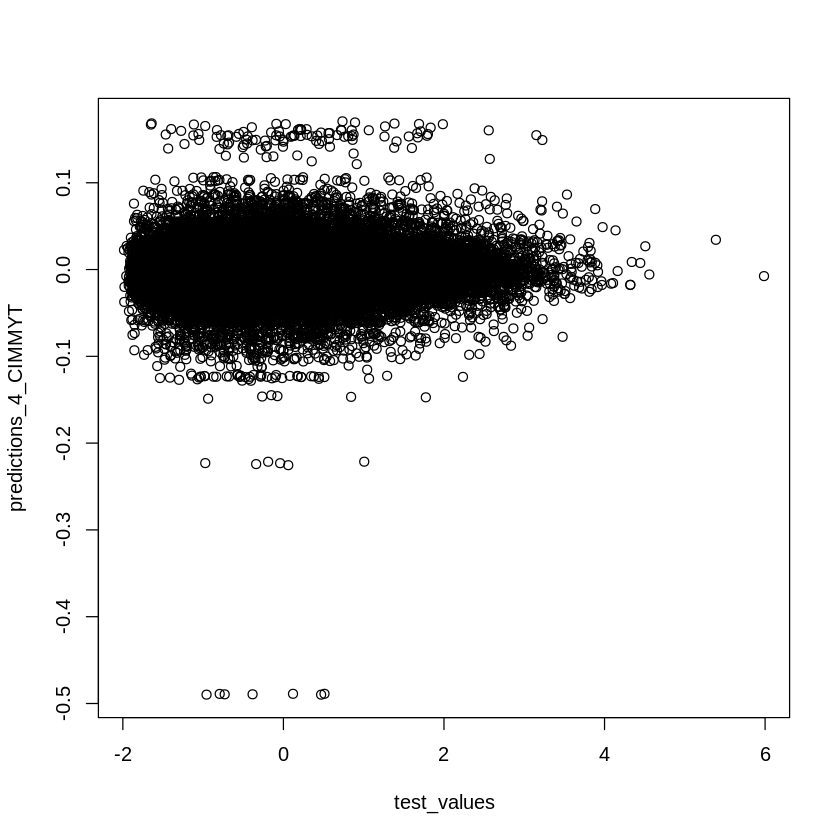

In [66]:
predictions_4_CIMMYT = fm4_CIMMYT$yHat[-train_random_sample]
test_values = y_sample$GRAIN_YIELD[-train_random_sample]
R2 = R2(predictions_4_CIMMYT, test_values)
RMSE = RMSE(predictions_4_CIMMYT, test_values)
MAE = MAE(predictions_4_CIMMYT, test_values)
model4_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model4_CIMMYT_scores)
plot(test_values,predictions_4_CIMMYT)

In [ ]:
# Fitting Model 3_GEE (Main Environment-Pedigree-Environmental Covariate Effects)
# (EAW)

W_gee_sample_div = W_gee_sample/sqrt(ncol(W_gee_sample))

In [67]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_gee_sample_div,model='BRR'))

In [ ]:
fm4_gee = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=500,burnIn=200)


           R2      RMSE       MAE
1 0.001161632 0.9994316 0.7966025


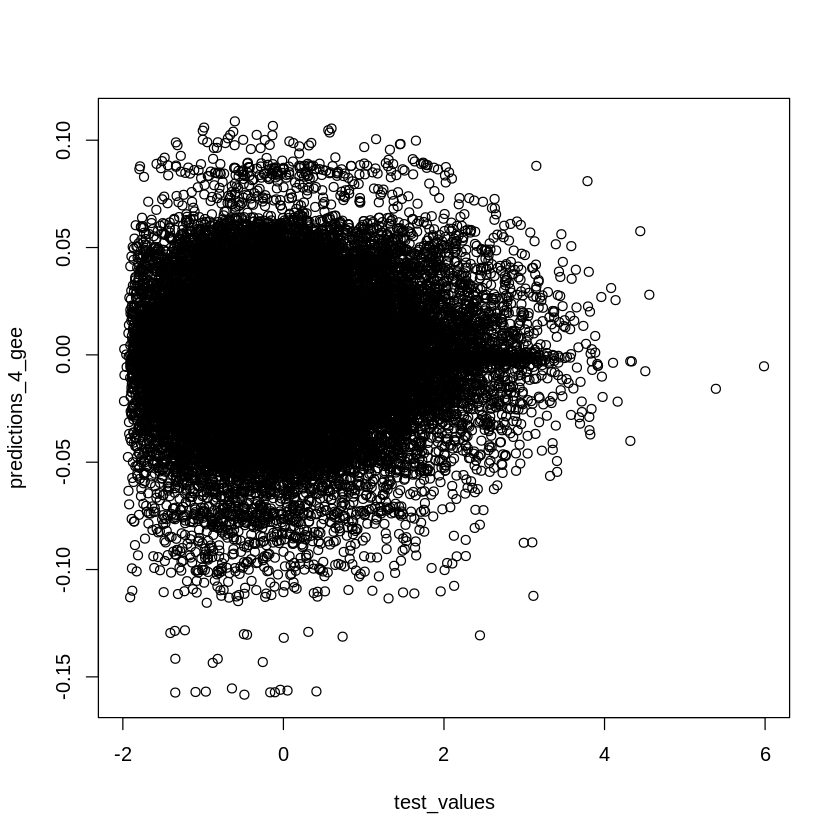

In [69]:
predictions_4_gee = fm4_gee$yHat[-train_random_sample]
test_values = y_sample$GRAIN_YIELD[-train_random_sample]
R2 = R2(predictions_4_gee, test_values)
RMSE = RMSE(predictions_4_gee, test_values)
MAE = MAE(predictions_4_gee, test_values)
model4_gee_scores = data.frame(R2, RMSE, MAE)
print(model4_gee_scores)
plot(test_values,predictions_4_gee)

## Model 5: Main Pedigree, Main Environment, and Interaction Effects

In [70]:
# Fitting Model 5 (Main Environment-Pedigree-Environmental Covariate Effects 
# with Pedigree-Environmental Covariate Interaction)
# (EAW-AxW) CIMMYT

# Results in vector of size 157.4 Gb, need sufficient RAM to hold

ZAZ = tcrossprod(Z_star)

W_matrix = as.matrix(W_CIMMYT_sample_div)

WW = tcrossprod(W_matrix)

K = ZAZ*WW
diag(K) = diag(K)+1/200 
K = K/mean(diag(K))
L2 = t(chol(K))

In [71]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_matrix,model='BRR'),
           AxW=list(X=L2,model='BRR'))

In [ ]:
fm5_CIMMYT = BGLR(y=y_train_na,ETA=ETA, saveAt='M4_',nIter=500,burnIn=200)

           R2       corr      RMSE       MAE
1 0.003482165 0.05900987 0.9984668 0.7957155


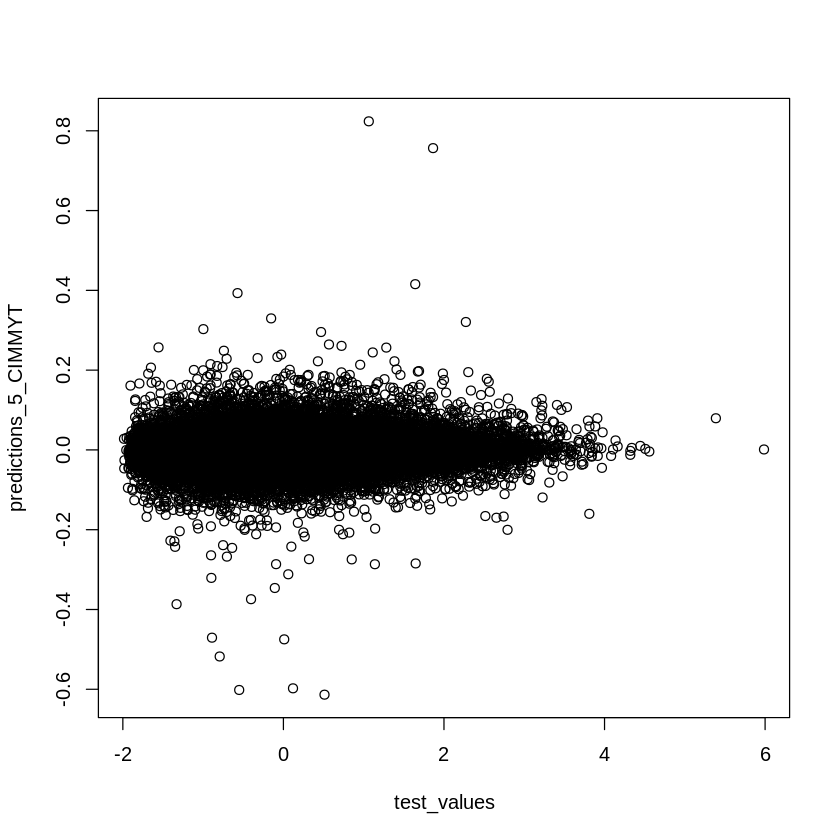

In [73]:
predictions_5_CIMMYT = fm5_CIMMYT$yHat[-train_random_sample]
test_values = y_sample$GRAIN_YIELD[-train_random_sample]
corr = cor(predictions_5_CIMMYT, test_values)
R2 = R2(predictions_5_CIMMYT, test_values)
RMSE = RMSE(predictions_5_CIMMYT, test_values)
MAE = MAE(predictions_5_CIMMYT, test_values)
model5_CIMMYT_scores = data.frame(R2, corr, RMSE, MAE)
print(model5_CIMMYT_scores)
plot(test_values,predictions_5_CIMMYT)

In [ ]:
remove(L2, W_matrix, K, WW)
# Garbage Collector to Clear up RAM
gc()

In [ ]:
# Fitting Model 5 (Main Environment-Pedigree-Environmental Covariate Effects 
# with Pedigree-Environmental Covariate Interaction)
# (EAW-AxW) GEE

# ZAZ = tcrossprod(Z_star) # Already run above

W_matrix = as.matrix(W_gee_sample_div)

WW = tcrossprod(W_matrix)

K = ZAZ*WW
diag(K) = diag(K)+1/200 
K = K/mean(diag(K))
L2 = t(chol(K))

In [ ]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_matrix,model='BRR'),
           AxW=list(X=L2,model='BRR'))

In [ ]:
fm5_gee = BGLR(y=y_train_na,ETA=ETA, saveAt='M4_',nIter=500,burnIn=200)

In [ ]:
predictions_5_GEE = fm5_gee$yHat[-train_random_sample]
test_values = y_sample$GRAIN_YIELD[-train_random_sample]
R2 = R2(predictions_5_GEE, test_values)
corr = cor(predictions_5_GEE, test_values)
RMSE = RMSE(predictions_5_GEE, test_values)
MAE = MAE(predictions_5_GEE, test_values)
model5_GEE_scores = data.frame(R2, corr, RMSE, MAE)
print(model5_GEE_scores)
plot(test_values,predictions_5_GEE)